In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import make_moons

In [2]:
import FrEIA.framework as Ff
import FrEIA.modules as Fm

In [3]:
batch_size = 100
n_dim = 2

In [4]:
def subnet_fc(dims_in, dims_out):
    return nn.Sequential(
        nn.Linear(dims_in, 512),
        nn.ReLU(),
        nn.Linear(512, dims_out)
    )

In [6]:
inn = Ff.SequenceINN(n_dim)
for k in range(8):
    inn.append(Fm.AllInOneBlock, subnet_constructor=subnet_fc, permute_soft=True)

In [7]:
optimizer = torch.optim.Adam(inn.parameters(), lr=0.001)

In [41]:
import tqdm

for i in tqdm.tqdm(range(1000)):
    optimizer.zero_grad()
    data, label = make_moons(n_samples=batch_size, noise=0.05)
    x = torch.Tensor(data)
    z, log_jac_det = inn(x)
    loss = 0.5 * torch.sum(z ** 2, dim=1) - log_jac_det
    loss = loss.mean() / n_dim
    loss.backward()
    optimizer.step()

100%|██████████| 1000/1000 [00:18<00:00, 53.64it/s]


In [42]:
z = torch.randn(batch_size*1000, n_dim)
samples, _ = inn(z, rev=True)

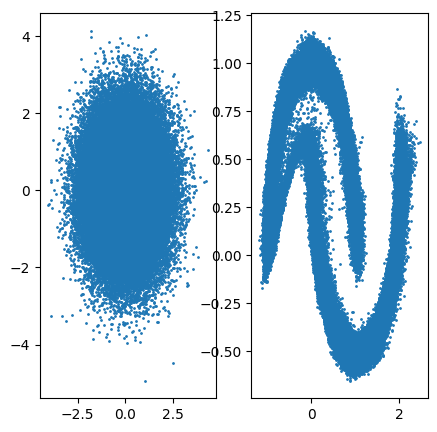

In [43]:
import matplotlib.pyplot as plt
samples = samples.detach().numpy()

fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].scatter(z[:, 0], z[:, 1], s=1)
ax[1].scatter(samples[:, 0], samples[:, 1], s=1)

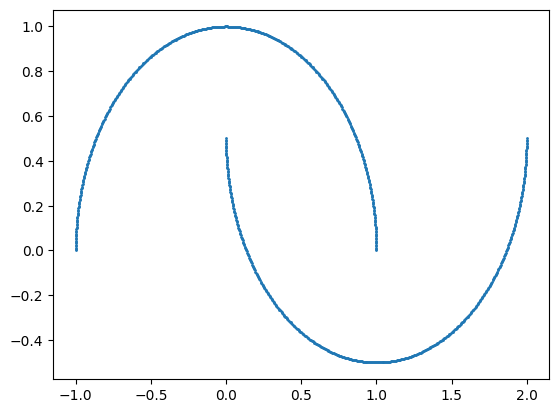

In [44]:
moons = make_moons(n_samples=1000)
plt.scatter(moons[0][:, 0], moons[0][:, 1], s=1)

In [89]:
import os
import pathlib
import shutil
from PIL import Image
import re

dataset_dir = "C:\\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly"
class_name = "glove_1"
class_dir = os.path.join(dataset_dir, class_name)

data_dir = pathlib.Path(class_dir)

In [90]:
class_list = [path.name for path in pathlib.Path(dataset_dir).iterdir()]
class_list

['glove1',
 'glove100',
 'glove95',
 'hair1',
 'hair100',
 'hair95',
 'larva4',
 'larva40',
 'larva56',
 'matal99',
 'metal2',
 'metal92']

In [91]:
for class_name in class_list:
    class_dir = os.path.join(dataset_dir, class_name)
    data_dir = pathlib.Path(class_dir)

    for sub_dir in data_dir.iterdir():


C:\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly\glove1\anomaly
C:\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly\glove1\normal


In [66]:
for sub_dir in data_dir.iterdir():
    print(sub_dir.parent)

C:\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly\glove_1
C:\Users\had-int22\PycharmProjects\Pytorch_AD\data\jelly\glove_1
